In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [149]:
df = pd.read_csv('YourCabs.csv')
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [6]:
df.nunique()

id                     43431
user_id                22267
vehicle_model_id          27
package_id                 7
travel_type_id             3
from_area_id             598
to_area_id               568
from_city_id               3
to_city_id               116
from_date              20377
online_booking             2
mobile_site_booking        2
booking_created        39349
from_lat                 466
from_long                462
to_lat                   450
to_long                  447
Car_Cancellation           2
dtype: int64

In [7]:
df['travel_type_id'].value_counts()

travel_type_id
2    34292
3     7550
1     1589
Name: count, dtype: int64

In [150]:
# dropping columns which are not needed
df1 = df.drop(columns=['id','user_id','vehicle_model_id'])
df1.head(5)

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [151]:
from datetime import datetime

df1['from_date']=pd.to_datetime(df1['from_date'], format = "mixed")
df1['from_date']

0       2013-01-01 02:00:00
1       2013-01-01 09:00:00
2       2013-01-01 03:30:00
3       2013-01-01 05:45:00
4       2013-01-01 09:00:00
                ...        
43426   2013-11-24 18:00:00
43427   2013-11-26 01:00:00
43428   2013-11-24 18:30:00
43429   2013-11-24 16:00:00
43430   2013-11-25 05:00:00
Name: from_date, Length: 43431, dtype: datetime64[ns]

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   package_id           7550 non-null   float64       
 1   travel_type_id       43431 non-null  int64         
 2   from_area_id         43343 non-null  float64       
 3   to_area_id           34293 non-null  float64       
 4   from_city_id         16345 non-null  float64       
 5   to_city_id           1588 non-null   float64       
 6   from_date            43431 non-null  datetime64[ns]
 7   online_booking       43431 non-null  int64         
 8   mobile_site_booking  43431 non-null  int64         
 9   booking_created      43431 non-null  object        
 10  from_lat             43338 non-null  float64       
 11  from_long            43338 non-null  float64       
 12  to_lat               34293 non-null  float64       
 13  to_long              34293 non-

In [152]:
df1['Day'] = df1['from_date'].dt.strftime("%d")
df1['Month'] = df1['from_date'].dt.strftime("%m")
df1['Year'] = df1['from_date'].dt.strftime("%Y")
# df1['MonthName'] = df1['from_date'].dt.strftime("%b")
df1['Hour of Day'] = df1['from_date'].dt.strftime("%H")

In [12]:
df1.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Day,Month,Year,Hour of Day
0,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,01,01,2013,02
1,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,01,01,2013,09
2,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,01,01,2013,03
3,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,01,01,2013,05
4,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,01,01,2013,09


In [153]:
df1['booking_created']=pd.to_datetime(df1['booking_created'], format = "mixed")
df1['booking_created']

0       2013-01-01 01:39:00
1       2013-01-01 02:25:00
2       2013-01-01 03:08:00
3       2013-01-01 04:39:00
4       2013-01-01 07:53:00
                ...        
43426   2013-11-24 14:25:00
43427   2013-11-24 14:30:00
43428   2013-11-24 14:35:00
43429   2013-11-24 14:43:00
43430   2013-11-24 14:50:00
Name: booking_created, Length: 43431, dtype: datetime64[ns]

In [154]:
from datetime import timedelta

start_date = pd.to_datetime(df1['from_date'])
end_date = pd.to_datetime(df1['booking_created'])

df1['diff_btw_booking'] = (end_date - start_date)
df1['diff_btw_booking']

0       -1 days +23:39:00
1       -1 days +17:25:00
2       -1 days +23:38:00
3       -1 days +22:54:00
4       -1 days +22:53:00
               ...       
43426   -1 days +20:25:00
43427   -2 days +13:30:00
43428   -1 days +20:05:00
43429   -1 days +22:43:00
43430   -1 days +09:50:00
Name: diff_btw_booking, Length: 43431, dtype: timedelta64[ns]

In [155]:
#df1['date_diff_in_days']=diff_btw_booking.dt.days+(diff_btw_booking.dt.seconds/(3600*24))

diff_in_days=[]

for i in df1['diff_btw_booking']:
    curr=i.days+(i.seconds/(3600*24))
    diff_in_days.append(curr)
    
diff_in_days=pd.DataFrame({'diff_in_days': diff_in_days})
df1.insert(6, 'diff_in_days', diff_in_days)

In [24]:
df1.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,diff_in_days,from_date,online_booking,mobile_site_booking,...,from_lat,from_long,to_lat,to_long,Car_Cancellation,Day,Month,Year,Hour of Day,diff_btw_booking
0,NaN,2,83.0,448.0,NaN,NaN,-0.014583,2013-01-01 02:00:00,0,0,...,12.924150,77.672290,12.927320,77.635750,0,01,01,2013,02,-1 days +23:39:00
1,NaN,2,1010.0,540.0,NaN,NaN,-0.274306,2013-01-01 09:00:00,0,0,...,12.966910,77.749350,12.927680,77.626640,0,01,01,2013,09,-1 days +17:25:00
2,NaN,2,1301.0,1034.0,NaN,NaN,-0.015278,2013-01-01 03:30:00,0,0,...,12.937222,77.626915,13.047926,77.597766,0,01,01,2013,03,-1 days +23:38:00
3,NaN,2,768.0,398.0,NaN,NaN,-0.045833,2013-01-01 05:45:00,0,0,...,12.989990,77.553320,12.971430,77.639140,0,01,01,2013,05,-1 days +22:54:00
4,NaN,2,1365.0,849.0,NaN,NaN,-0.046528,2013-01-01 09:00:00,0,0,...,12.845653,77.677925,12.954340,77.600720,0,01,01,2013,09,-1 days +22:53:00


In [17]:
# pip install geopy
#pip install geodesic

In [179]:
coor1= (df1['from_lat'].to_frame(),df1['from_long'].to_frame())
coor1[0]

,from_lat
0,12.924150
1,12.966910
2,12.937222
3,12.989990
4,12.845653
...,...
43426,13.030640
43427,13.199560
43428,13.075570
43429,12.968970


In [156]:
from geopy.distance import great_circle, geodesic
import geopy
#import geodesic as GD
#import geopandas
#from shapely.geometry import Point

#coords_1 = (df1['from_lat'].item(), df1['from_long'].item())
#coords_2 = (df1['to_lat'].item(), df1['to_long'].item())
#geopy.distance.geodesic(coords_1,coords_2).km
#print(geopy.distance.geodesic(coords_1, coords_2).km)

# Calculate distance using the 'geodesic' method, which is more accurate for Earth
#distance_km = geodesic(coords_1 , coords_2).kilometers
#print(f"Distance: {distance_km:.2f} km")

#-------------- above method giving error of series valuesError---------

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [29]:
# Apply the haversine function to each row
#df1['distance'] = df1.apply(lambda row: haversine(row['from_lat'], row['from_long'], row['to_lat'], row['to_long']), axis=1)

In [180]:
data1.head()

,from_area_id,from_city_id,to_city_id,diff_in_days,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,Day,Month,Year,Hour of Day,diff_btw_booking,distance,distance-test
6,571.0,15.0,108.0,-0.016667,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,12.951850,77.696420,0,01,01,2013,09,-1 days +23:36:00,NaN,NaN
17,1383.0,NaN,32.0,-10.821528,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,12.930451,77.685822,0,12,01,2013,08,-11 days +04:17:00,NaN,NaN
24,515.0,15.0,32.0,-3.743056,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,12.978960,77.673450,0,05,01,2013,08,-4 days +06:10:00,NaN,NaN
158,136.0,1.0,152.0,-0.882639,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,12.907960,77.624180,0,04,01,2013,09,-1 days +02:49:00,NaN,NaN
216,1118.0,NaN,32.0,-1.915278,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,12.930220,77.560390,0,06,01,2013,07,-2 days +02:02:00,NaN,NaN


## Model 1 creation for Travel Type 2

In [157]:
# splitting for Travel type = 2
data2= df1[df1['travel_type_id']==2]
data2.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,diff_in_days,from_date,online_booking,mobile_site_booking,...,from_lat,from_long,to_lat,to_long,Car_Cancellation,Day,Month,Year,Hour of Day,diff_btw_booking
0,NaN,2,83.0,448.0,NaN,NaN,-0.014583,2013-01-01 02:00:00,0,0,...,12.924150,77.672290,12.927320,77.635750,0,01,01,2013,02,-1 days +23:39:00
1,NaN,2,1010.0,540.0,NaN,NaN,-0.274306,2013-01-01 09:00:00,0,0,...,12.966910,77.749350,12.927680,77.626640,0,01,01,2013,09,-1 days +17:25:00
2,NaN,2,1301.0,1034.0,NaN,NaN,-0.015278,2013-01-01 03:30:00,0,0,...,12.937222,77.626915,13.047926,77.597766,0,01,01,2013,03,-1 days +23:38:00
3,NaN,2,768.0,398.0,NaN,NaN,-0.045833,2013-01-01 05:45:00,0,0,...,12.989990,77.553320,12.971430,77.639140,0,01,01,2013,05,-1 days +22:54:00
4,NaN,2,1365.0,849.0,NaN,NaN,-0.046528,2013-01-01 09:00:00,0,0,...,12.845653,77.677925,12.954340,77.600720,0,01,01,2013,09,-1 days +22:53:00


In [159]:
# in case of Travel Type= 1 package id and to area not applicable so we can drop corresponding coln
data2 = data2.drop(columns=['package_id','travel_type_id','from_city_id','to_city_id','from_date','booking_created','travel_type_id','diff_btw_booking'],axis=1)
data2.head()

,from_area_id,to_area_id,diff_in_days,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,Day,Month,Year,Hour of Day
0,83.0,448.0,-0.014583,0,0,12.924150,77.672290,12.927320,77.635750,0,01,01,2013,02
1,1010.0,540.0,-0.274306,0,0,12.966910,77.749350,12.927680,77.626640,0,01,01,2013,09
2,1301.0,1034.0,-0.015278,0,0,12.937222,77.626915,13.047926,77.597766,0,01,01,2013,03
3,768.0,398.0,-0.045833,0,0,12.989990,77.553320,12.971430,77.639140,0,01,01,2013,05
4,1365.0,849.0,-0.046528,0,0,12.845653,77.677925,12.954340,77.600720,0,01,01,2013,09


In [160]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         34292 non-null  float64
 1   to_area_id           34292 non-null  float64
 2   diff_in_days         34292 non-null  float64
 3   online_booking       34292 non-null  int64  
 4   mobile_site_booking  34292 non-null  int64  
 5   from_lat             34292 non-null  float64
 6   from_long            34292 non-null  float64
 7   to_lat               34292 non-null  float64
 8   to_long              34292 non-null  float64
 9   Car_Cancellation     34292 non-null  int64  
 10  Day                  34292 non-null  object 
 11  Month                34292 non-null  object 
 12  Year                 34292 non-null  object 
 13  Hour of Day          34292 non-null  object 
dtypes: float64(7), int64(3), object(4)
memory usage: 3.9+ MB


In [161]:
data2[['Day','Month','Year','Hour of Day']]=data2[['Day','Month','Year','Hour of Day']].astype({'Day':'int64','Month':'int64','Year':'int64','Hour of Day':'float64'})

In [162]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         34292 non-null  float64
 1   to_area_id           34292 non-null  float64
 2   diff_in_days         34292 non-null  float64
 3   online_booking       34292 non-null  int64  
 4   mobile_site_booking  34292 non-null  int64  
 5   from_lat             34292 non-null  float64
 6   from_long            34292 non-null  float64
 7   to_lat               34292 non-null  float64
 8   to_long              34292 non-null  float64
 9   Car_Cancellation     34292 non-null  int64  
 10  Day                  34292 non-null  int64  
 11  Month                34292 non-null  int64  
 12  Year                 34292 non-null  int64  
 13  Hour of Day          34292 non-null  float64
dtypes: float64(8), int64(6)
memory usage: 3.9 MB


In [148]:
data2.isnull().sum()/len(data2)*100

from_area_id           0.000000
to_area_id             0.000000
diff_in_days           0.000000
online_booking         0.000000
mobile_site_booking    0.000000
from_lat               0.000000
from_long              0.000000
to_lat                 0.000000
to_long                0.000000
Car_Cancellation       0.000000
Day                    0.000000
Month                  0.000000
Year                   0.000000
Hour of Day            0.000000
distance               0.000000
distance-test          0.198297
dtype: float64

In [52]:
data2 = data2.drop(columns='distance-test',axis=1)

In [163]:
# Apply the haversine function to each row
data2['distance'] = data2.apply(lambda row: haversine(row['from_lat'], row['from_long'], row['to_lat'], row['to_long']), axis=1)

In [164]:
data2 = data2.drop(columns=['from_lat','from_long','to_lat','to_long'],axis=1)

In [54]:
#datetime.timedelta(0, 8, 562000)
#seconds_in_day = 24 * 60 * 60
#data2['date_diff_in_days']=divmod(diff_btw_booking.dt.days * seconds_in_day + diff_btw_booking.dt.seconds, 60)


#x= diff_btw_booking.Seconds + diff_btw_booking * 24 * 365
#x



In [167]:
data2 = data2.drop(columns=['from_area_id','to_area_id'],axis=1)

In [168]:
data2.describe()

,diff_in_days,online_booking,mobile_site_booking,Car_Cancellation,Day,Month,Year,Hour of Day,distance
count,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000
mean,-1.550089,0.363058,0.048087,0.080923,15.597632,6.456987,2013.000058,12.266855,17.378964
std,4.204905,0.480889,0.213953,0.272720,8.784380,2.945519,0.007637,6.396850,10.463727
min,-79.454167,0.000000,0.000000,0.000000,1.000000,1.000000,2013.000000,0.000000,0.000000
25%,-0.798611,0.000000,0.000000,0.000000,8.000000,4.000000,2013.000000,7.000000,8.569049
50%,-0.368056,0.000000,0.000000,0.000000,15.000000,7.000000,2013.000000,12.000000,14.675534
75%,-0.132639,1.000000,0.000000,0.000000,23.000000,9.000000,2013.000000,18.000000,26.283357
max,0.954167,1.000000,1.000000,1.000000,31.000000,12.000000,2014.000000,23.000000,59.841842


<Axes: >

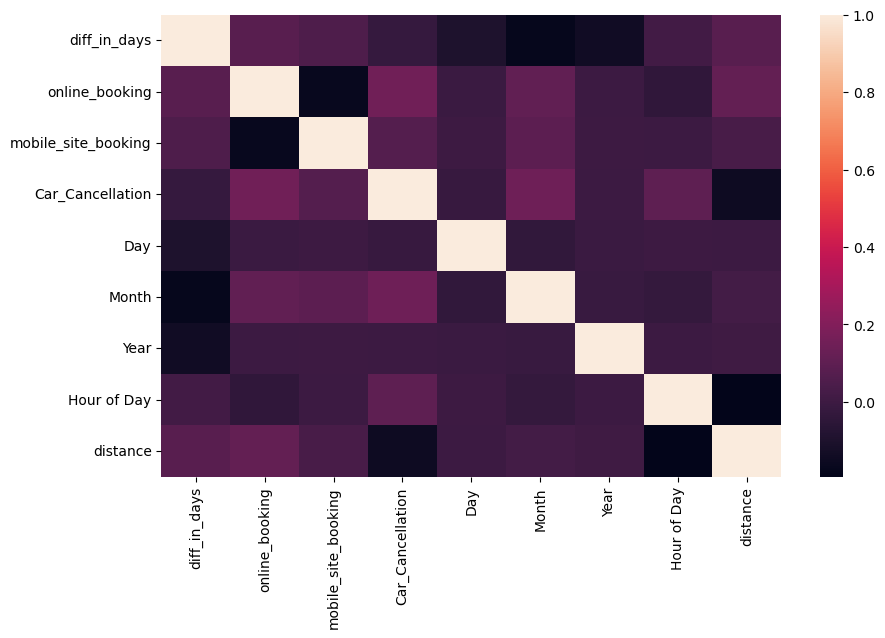

In [169]:
plt.figure(figsize=(10,6))
sns.heatmap(data2.corr())

## splitting data into train test

In [170]:
x = data2.drop('Car_Cancellation', axis=1)
y = data2['Car_Cancellation']

In [62]:
x

,from_area_id,to_area_id,diff_in_days,online_booking,mobile_site_booking,Day,Month,Year,Hour of Day,distance
0,83.0,448.0,-0.014583,0,0,1,1,2013,2.0,3.975764
1,1010.0,540.0,-0.274306,0,0,1,1,2013,9.0,13.995033
2,1301.0,1034.0,-0.015278,0,0,1,1,2013,3.0,12.708414
3,768.0,398.0,-0.045833,0,0,1,1,2013,5.0,9.525153
4,1365.0,849.0,-0.046528,0,0,1,1,2013,9.0,14.699782
...,...,...,...,...,...,...,...,...,...,...
43425,585.0,1226.0,-0.400000,0,1,25,11,2013,0.0,12.174196
43426,1147.0,452.0,-0.149306,1,0,24,11,2013,18.0,10.711968
43427,393.0,466.0,-1.437500,1,0,26,11,2013,1.0,21.345603
43429,1263.0,542.0,-0.053472,0,0,24,11,2013,16.0,4.594393


In [171]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=4892)

In [172]:
x_train.head()

,diff_in_days,online_booking,mobile_site_booking,Day,Month,Year,Hour of Day,distance
33059,-0.245833,0,0,13,9,2013,16.0,13.030357
29351,-0.685417,1,0,23,8,2013,8.0,25.773481
36838,-0.029167,0,0,8,10,2013,12.0,28.502152
9117,-0.028472,0,0,6,4,2013,14.0,10.007055
507,-1.603472,1,0,9,1,2013,7.0,18.369520


In [65]:
y_train.head()

33059    0
29351    0
36838    0
9117     0
507      0
Name: Car_Cancellation, dtype: int64

<Axes: >

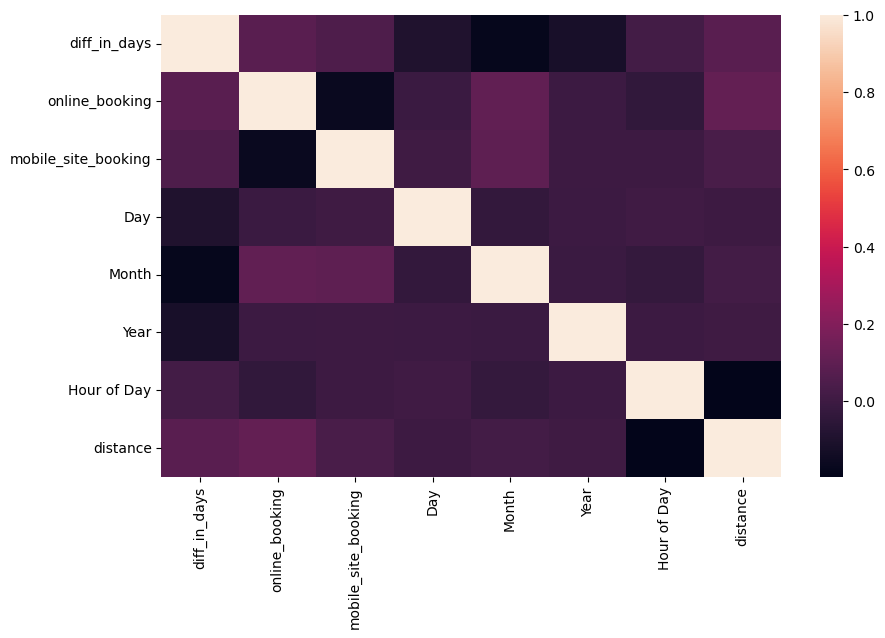

In [173]:
plt.figure(figsize=(10,6))
sns.heatmap(x_train.corr())

In [68]:
#plt.figure(figsize=(10,6))
#data2.hist(column='date_diff_in_days',by='Car_Cancellation')

In [174]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [175]:

re_model = RandomForestClassifier(n_estimators=100,random_state=0)  
#regressor = DecisionTreeClassifier(random_state=0)  
re_model.fit(x_train, y_train)  
y_pred = re_model.predict(x_test) 
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))


[[7802  100]
 [ 481  190]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7902
           1       0.66      0.28      0.40       671

    accuracy                           0.93      8573
   macro avg       0.80      0.64      0.68      8573
weighted avg       0.92      0.93      0.92      8573

0.9322290913332556


In [176]:

GB = GradientBoostingClassifier(random_state=0)  
GB.fit(x_train, y_train)  
y_pred = GB.predict(x_test) 
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))


[[7849   53]
 [ 530  141]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7902
           1       0.73      0.21      0.33       671

    accuracy                           0.93      8573
   macro avg       0.83      0.60      0.65      8573
weighted avg       0.92      0.93      0.91      8573

0.9319958007698589


In [177]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
from sklearn.feature_selection import RFE # Feature Selection (fi_df3)
selector1 = RFE(estimator= rfmodel, n_features_to_select=30, step=1)
selector1 = selector1.fit(x_train, y_train)

In [178]:
from sklearn.model_selection import cross_val_score

training = cross_val_score(selector1, x_train, y_train, cv=10)
print(training.mean())
print(training.max())

0.9307127501205272
0.9393468118195957


In [132]:
data2.head()

,from_area_id,from_city_id,to_city_id,diff_in_days,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,Day,Month,Year,Hour of Day,diff_btw_booking,distance,distance-test
6,571.0,15.0,108.0,-0.016667,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,12.951850,77.696420,0,01,01,2013,09,-1 days +23:36:00,NaN,NaN
17,1383.0,NaN,32.0,-10.821528,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,12.930451,77.685822,0,12,01,2013,08,-11 days +04:17:00,NaN,NaN
24,515.0,15.0,32.0,-3.743056,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,12.978960,77.673450,0,05,01,2013,08,-4 days +06:10:00,NaN,NaN
158,136.0,1.0,152.0,-0.882639,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,12.907960,77.624180,0,04,01,2013,09,-1 days +02:49:00,NaN,NaN
216,1118.0,NaN,32.0,-1.915278,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,12.930220,77.560390,0,06,01,2013,07,-2 days +02:02:00,NaN,NaN


## Model 2 creation for Travel Type 1

In [181]:
data1= df1[df1['travel_type_id']==1]
data1.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,diff_in_days,from_date,online_booking,mobile_site_booking,...,from_lat,from_long,to_lat,to_long,Car_Cancellation,Day,Month,Year,Hour of Day,diff_btw_booking
6,NaN,1,571.0,NaN,15.0,108.0,-0.016667,2013-01-01 09:45:00,0,0,...,12.951850,77.696420,NaN,NaN,0,01,01,2013,09,-1 days +23:36:00
17,NaN,1,1383.0,NaN,NaN,32.0,-10.821528,2013-01-12 08:00:00,1,0,...,12.930451,77.685822,NaN,NaN,0,12,01,2013,08,-11 days +04:17:00
24,NaN,1,515.0,NaN,15.0,32.0,-3.743056,2013-01-05 08:30:00,0,0,...,12.978960,77.673450,NaN,NaN,0,05,01,2013,08,-4 days +06:10:00
158,NaN,1,136.0,NaN,1.0,152.0,-0.882639,2013-01-04 09:30:00,1,0,...,12.907960,77.624180,NaN,NaN,0,04,01,2013,09,-1 days +02:49:00
216,NaN,1,1118.0,NaN,NaN,32.0,-1.915278,2013-01-06 07:30:00,1,0,...,12.930220,77.560390,NaN,NaN,0,06,01,2013,07,-2 days +02:02:00


In [182]:
# in case of Travel Type= 1 package id and to area not applicable so we can drop corresponding coln
data1 = data1.drop(columns=['package_id','travel_type_id','to_area_id','from_date','from_lat','from_long','to_lat','to_long','booking_created'],axis=1)
data1.head(5)

,from_area_id,from_city_id,to_city_id,diff_in_days,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Day,Month,Year,Hour of Day,diff_btw_booking
6,571.0,15.0,108.0,-0.016667,0,0,2013-01-01 09:21:00,0,01,01,2013,09,-1 days +23:36:00
17,1383.0,NaN,32.0,-10.821528,1,0,2013-01-01 12:17:00,0,12,01,2013,08,-11 days +04:17:00
24,515.0,15.0,32.0,-3.743056,0,0,2013-01-01 14:40:00,0,05,01,2013,08,-4 days +06:10:00
158,136.0,1.0,152.0,-0.882639,1,0,2013-01-03 12:19:00,0,04,01,2013,09,-1 days +02:49:00
216,1118.0,NaN,32.0,-1.915278,1,0,2013-01-04 09:32:00,0,06,01,2013,07,-2 days +02:02:00


In [184]:

# Initialize an empty DataFrame for results
result_df = pd.DataFrame()
for aid in data1['from_area_id'].unique():
     # Filter rows for the current value
    filtered_df = data1[data1['from_area_id'] == aid].copy()
    
    # Calculate the total value for the current selection
    total_value = filtered_df['from_area_id'].count()
 
    # Avoid division by zero
    if total_value == 0:
        filtered_df['Percentage'] = 0
    else:
        # Calculate the percentage for each row in the filtered DataFrame
        filtered_df['Percentage'] = (filtered_df['Car_Cancellation'] / total_value) * 100
    
    # Append the results to the result DataFrame
    result_df = pd.concat([result_df, filtered_df])

print(result_df)

       from_area_id  from_city_id  to_city_id  diff_in_days  online_booking  \
6             571.0          15.0       108.0     -0.016667               0   
1407          571.0          15.0       178.0     -1.711806               0   
2413          571.0           NaN       108.0     -0.559028               1   
2440          571.0          15.0       185.0     -0.464583               0   
2839          571.0           1.0       131.0     -0.400000               1   
...             ...           ...         ...           ...             ...   
42230         187.0          15.0        44.0     -2.293750               1   
42618        1304.0          15.0        32.0      0.044444               0   
43046        1041.0          15.0       146.0     -3.565278               0   
43385         119.0          15.0       146.0     -5.608333               1   
43407        1180.0          15.0        62.0    -30.143056               0   

       mobile_site_booking  Car_Cancellation Day Mo

In [186]:
result_df.head(1000)

,from_area_id,from_city_id,to_city_id,diff_in_days,online_booking,mobile_site_booking,Car_Cancellation,Day,Month,Year,Hour of Day,Percentage
6,571.0,15.0,108.0,-0.016667,0,0,0,01,01,2013,09,0.000000
1407,571.0,15.0,178.0,-1.711806,0,0,0,19,01,2013,06,0.000000
2413,571.0,NaN,108.0,-0.559028,1,0,0,27,01,2013,07,0.000000
2440,571.0,15.0,185.0,-0.464583,0,0,0,27,01,2013,08,0.000000
2839,571.0,1.0,131.0,-0.400000,1,0,0,31,01,2013,06,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
36433,83.0,15.0,32.0,-0.718750,0,0,0,06,10,2013,06,0.000000
37648,83.0,15.0,113.0,-0.225694,1,0,1,13,10,2013,06,3.448276
37723,83.0,15.0,32.0,-0.614583,0,0,0,14,10,2013,06,0.000000
37776,83.0,15.0,32.0,-0.359722,1,0,0,14,10,2013,06,0.000000


In [188]:
x1 = data1.drop('Car_Cancellation', axis=1)
y1 = data1['Car_Cancellation']

In [189]:
from sklearn.model_selection import train_test_split

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,train_size=0.75,random_state=4892)

In [191]:

re_model = RandomForestClassifier(n_estimators=100,random_state=0)  
#regressor = DecisionTreeClassifier(random_state=0)  
re_model.fit(x_train, y_train)  
y_pred = re_model.predict(x_test) 
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

print("---------"*10)

GB = GradientBoostingClassifier(random_state=0)  
GB.fit(x_train, y_train)  
y_pred = GB.predict(x_test) 
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))


[[7802  100]
 [ 481  190]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7902
           1       0.66      0.28      0.40       671

    accuracy                           0.93      8573
   macro avg       0.80      0.64      0.68      8573
weighted avg       0.92      0.93      0.92      8573

0.9322290913332556
------------------------------------------------------------------------------------------
[[7849   53]
 [ 530  141]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7902
           1       0.73      0.21      0.33       671

    accuracy                           0.93      8573
   macro avg       0.83      0.60      0.65      8573
weighted avg       0.92      0.93      0.91      8573

0.9319958007698589


## Module 3 for Travek type 3

In [209]:
data3= df1[df1['travel_type_id']==3]
data3.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,diff_in_days,from_date,online_booking,mobile_site_booking,...,from_lat,from_long,to_lat,to_long,Car_Cancellation,Day,Month,Year,Hour of Day,diff_btw_booking
8,2.0,3,448.0,NaN,NaN,NaN,-0.261111,2013-01-01 16:00:00,0,0,...,12.927320,77.635750,NaN,NaN,0,01,01,2013,16,-1 days +17:44:00
20,2.0,3,471.0,NaN,NaN,NaN,-0.068056,2013-01-01 14:30:00,0,0,...,13.018540,77.635240,NaN,NaN,0,01,01,2013,14,-1 days +22:22:00
23,1.0,3,1286.0,NaN,NaN,NaN,-0.077083,2013-01-01 16:30:00,0,0,...,12.973448,77.620320,NaN,NaN,0,01,01,2013,16,-1 days +22:09:00
34,1.0,3,1323.0,NaN,NaN,NaN,-0.107639,2013-01-01 20:00:00,1,0,...,12.869805,77.653211,NaN,NaN,0,01,01,2013,20,-1 days +21:25:00
47,2.0,3,142.0,NaN,NaN,NaN,-0.307639,2013-01-02 03:00:00,0,0,...,12.912810,77.609230,NaN,NaN,0,02,01,2013,03,-1 days +16:37:00


In [ ]:
data3 = data3.drop(columns=['package_id','travel_type_id','from_city_id','to_city_id','from_date','booking_created','travel_type_id','diff_btw_booking'],axis=1)
data3.head()

In [214]:
import os 
import sys 
script_directory = os.path.dirname(os.path.abspath(sys.argv[0])) 
print(script_directory)

C:\Users\Ram Nagar\anaconda3\Lib\site-packages
